#### SciPy é uma coleção de pacotes para operações matemática e científicas.

## Processamento de imagens

In [1]:
import scipy.misc
#from scipy import misc
#misc.imread('Matplotlib-Mapa.png')    

# Matplotlib tem uma função similar
import matplotlib.pyplot as plt
plt.imread('Matplotlib-Mapa.png')    

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       ...,

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        ...,
        [1., 1., 1., 1.],
        [1., 1.

## Integração Numérica

In [5]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [6]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [7]:
from scipy.integrate import odeint, ode

In [8]:
from pylab import *
%matplotlib inline

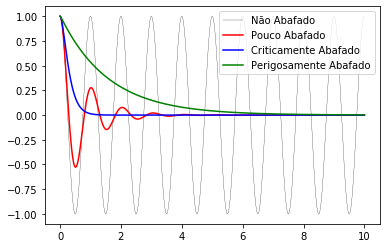

In [9]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

## Fourier Transformation

In [10]:
from scipy.fftpack import *

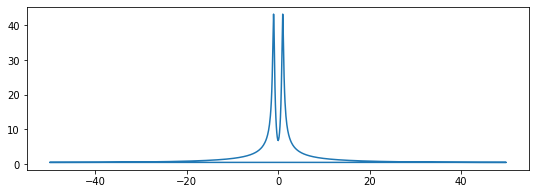

In [11]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Álgebra Linear

In [12]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])

In [13]:
# Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([-0.23333333,  0.46666667,  0.1       ])

In [14]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.54467111+0.j        , -0.29183474+0.29947602j,
       -0.29183474-0.29947602j])

In [15]:
evecs

array([[ 0.50565225+0.j        ,  0.71722177+0.j        ,
         0.71722177-0.j        ],
       [ 0.34167867+0.j        , -0.19436395+0.44882777j,
        -0.19436395-0.44882777j],
       [ 0.79219409+0.j        , -0.31294792-0.3852698j ,
        -0.31294792+0.3852698j ]])

In [16]:
svd(A)

(array([[-0.5845993 , -0.76161193,  0.27962642],
        [-0.26629574,  0.5056844 ,  0.82059117],
        [-0.76637474,  0.4052537 , -0.49843676]]),
 array([1.64005936, 0.51257916, 0.32128436]),
 array([[-0.45530548, -0.64681124, -0.61182689],
        [ 0.52637335, -0.74978371,  0.40094325],
        [-0.71807243, -0.13949771,  0.68184483]]))

### Otimização

In [17]:
from scipy import optimize

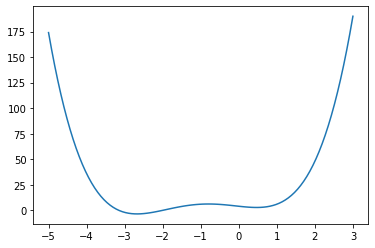

In [18]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [19]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 18
         Gradient evaluations: 6


array([0.46961743])

### Estatística

In [20]:
from scipy import stats

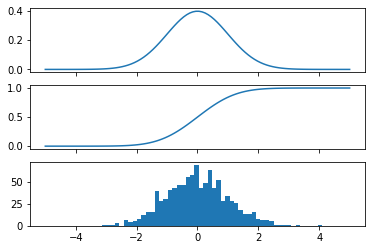

In [21]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [22]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [23]:
# T-test
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(1.0602673611995175, 0.28915113462264963)

# Fim